In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-category-bank/Data category bank .csv



**1. Import Libraries**

In [2]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import matplotlib as mpl
import matplotlib.pyplot as plt



import statsmodels.api as sm

# readable figures
pd.set_option('float_format', '{:f}'.format)

**2. Load Data**

In [3]:
df = pd.read_csv('../input/data-category-bank/Data category bank .csv')
df.head()

,Emitten,DER,ROA,Sales Growth,ROE,NPM,Category
0,AGRO,7.150000,-0.090000,-185.032137,-0.720000,-1.400000,3
1,BBCA,4.880000,0.030000,-1485.583000,0.150000,0.590000,2
2,BBHI,4.360000,0.010000,121.858090,0.060000,0.300000,2
3,BBKP,10.030000,-0.010000,-1445.750000,-0.060000,-0.140000,1
4,BBMD,2.900000,0.030000,61.545475,0.110000,0.510000,2


In [4]:
df.describe()

,DER,ROA,Sales Growth,ROE,NPM,Category
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,6.030000,0.005833,55.001594,-0.011667,-0.001667,1.916667
std,3.503758,0.031611,2377.021390,0.193473,0.484236,0.503610
min,0.360000,-0.090000,-4246.426000,-0.720000,-1.400000,1.000000
25%,4.112500,0.005000,-1112.673500,0.000000,0.010000,2.000000
50%,5.280000,0.010000,-1.098266,0.050000,0.115000,2.000000
75%,7.337500,0.012500,281.745586,0.085000,0.222500,2.000000
max,15.820000,0.080000,7034.205000,0.150000,0.650000,3.000000


**3.Multinomial logistic regression with scikit-learn**

In [5]:
display(df)

,Emitten,DER,ROA,Sales Growth,ROE,NPM,Category
0,AGRO,7.150000,-0.090000,-185.032137,-0.720000,-1.400000,3
1,BBCA,4.880000,0.030000,-1485.583000,0.150000,0.590000,2
2,BBHI,4.360000,0.010000,121.858090,0.060000,0.300000,2
3,BBKP,10.030000,-0.010000,-1445.750000,-0.060000,-0.140000,1
4,BBMD,2.900000,0.030000,61.545475,0.110000,0.510000,2
5,BBNI,6.520000,0.010000,-4246.426000,0.050000,0.140000,2
6,BBRI,4.780000,0.010000,6531.747000,0.080000,0.220000,2
7,BBSI,0.490000,0.040000,22.556467,0.060000,0.650000,2
8,BBTN,15.820000,0.010000,129.291000,0.100000,0.110000,1
9,BBYB,6.310000,-0.040000,167.373288,-0.320000,-0.700000,3



**Drop Irrelevant Data untuk variabel X**

In [6]:
x = df.drop(['Category','Emitten'], axis=1)
x.head()

,DER,ROA,Sales Growth,ROE,NPM
0,7.150000,-0.090000,-185.032137,-0.720000,-1.400000
1,4.880000,0.030000,-1485.583000,0.150000,0.590000
2,4.360000,0.010000,121.858090,0.060000,0.300000
3,10.030000,-0.010000,-1445.750000,-0.060000,-0.140000
4,2.900000,0.030000,61.545475,0.110000,0.510000


In [7]:
y = df['Category']
y.head()

0    3
1    2
2    2
3    1
4    2
Name: Category, dtype: int64

**Standardize the Data**

In [8]:
from sklearn.preprocessing import StandardScaler 
from sklearn import preprocessing
x_scaled = StandardScaler().fit_transform(x)
data_scaled = pd.DataFrame(x_scaled, columns=df.columns.drop(['Emitten','Category']))

data_scaled

,DER,ROA,Sales Growth,ROE,NPM
0,0.326532,-3.096818,-0.103153,-3.739888,-2.949822
1,-0.335278,0.780937,-0.662055,0.853574,1.248137
2,-0.486882,0.134644,0.028731,0.378389,0.636374
3,1.166185,-0.511648,-0.644937,-0.255192,-0.291818
4,-0.912540,0.780937,0.002812,0.642381,1.079375
5,0.142858,0.134644,-1.848508,0.325590,0.298850
6,-0.364433,0.134644,2.783335,0.483985,0.467612
7,-1.615167,1.104083,-0.013943,0.378389,1.374708
8,2.854239,0.134644,0.031925,0.589582,0.235564
9,0.081633,-1.481087,0.048291,-1.627951,-1.473153


In [9]:
display(df)

,Emitten,DER,ROA,Sales Growth,ROE,NPM,Category
0,AGRO,7.150000,-0.090000,-185.032137,-0.720000,-1.400000,3
1,BBCA,4.880000,0.030000,-1485.583000,0.150000,0.590000,2
2,BBHI,4.360000,0.010000,121.858090,0.060000,0.300000,2
3,BBKP,10.030000,-0.010000,-1445.750000,-0.060000,-0.140000,1
4,BBMD,2.900000,0.030000,61.545475,0.110000,0.510000,2
5,BBNI,6.520000,0.010000,-4246.426000,0.050000,0.140000,2
6,BBRI,4.780000,0.010000,6531.747000,0.080000,0.220000,2
7,BBSI,0.490000,0.040000,22.556467,0.060000,0.650000,2
8,BBTN,15.820000,0.010000,129.291000,0.100000,0.110000,1
9,BBYB,6.310000,-0.040000,167.373288,-0.320000,-0.700000,3


Split Data, tentukan X train, Y train, X test dan Y test

In [10]:
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.3)

training size : 70%
testing size : 30%
semakin besar data training, semakin besar akurasi

**Multinomial Logit with the statsmodel library**

In [11]:
mnlogit_mod = sm.MNLogit(y,sm.add_constant(data_scaled))
mnlogit_fit = mnlogit_mod.fit(method='bfgs')

print (mnlogit_fit.summary())

Optimization terminated successfully.
         Current function value: 0.000004
         Iterations: 21
         Function evaluations: 22
         Gradient evaluations: 22
                          MNLogit Regression Results                          
Dep. Variable:               Category   No. Observations:                   24
Model:                        MNLogit   Df Residuals:                       12
Method:                           MLE   Df Model:                           10
Date:                Fri, 08 Jul 2022   Pseudo R-squ.:                   1.000
Time:                        14:54:03   Log-Likelihood:            -8.6197e-05
converged:                       True   LL-Null:                       -17.315
Covariance Type:            nonrobust   LLR p-value:                 0.0001444
  Category=2       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           23.7359   8.06e+05

**Fit The Model

Y Prediction**

In [12]:
logistic_regresion = LogisticRegression(multi_class='auto').fit(x,y)
y_pred = logistic_regresion.predict(testX)
y_pred

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


array([2, 3, 2, 2, 2, 2, 1, 2])

 **Intercept**

In [13]:
print('Intercept :', logistic_regresion.intercept_)

Intercept : [-3.1010003   3.7690791  -0.66807881]


**Koefisien**

In [14]:
print(logistic_regresion.coef_)

[[ 4.35344712e-01  1.53302075e-02  2.37005600e-05  1.66909640e-01
  -2.52989557e-03]
 [-2.61259391e-01  8.62296063e-02 -6.93210331e-05  4.98474857e-01
   1.30733967e+00]
 [-1.74085322e-01 -1.01559814e-01  4.56204739e-05 -6.65384497e-01
  -1.30480977e+00]]


**Model Validation / Testing The Model******

Mendapatkan Prediction test menggunakan model

In [15]:
prediction_test = logistic_regresion.predict(testX)

Print akurasi dan error rate

In [16]:
print('Accuracy: {:.2f}'.format(accuracy_score(testY, y_pred)))
print('Error rate: {:.2f}'.format(1 - accuracy_score(testY, y_pred)))

Accuracy: 1.00
Error rate: 0.00


**Matrix**

In [17]:
confusion_matrix = confusion_matrix(testY, y_pred)
print(confusion_matrix)

[[1 0 0]
 [0 6 0]
 [0 0 1]]


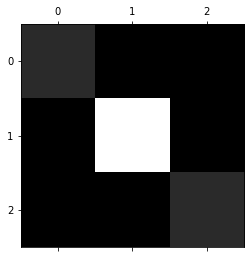

In [18]:
plt.matshow(confusion_matrix, cmap=plt.cm.gray)
plt.show()

**Probabilitas**

In [19]:
probability = logistic_regresion.predict_proba(testX)
probability

array([[0.01677231, 0.96951951, 0.01370819],
       [0.28590372, 0.24063996, 0.47345633],
       [0.01170168, 0.98560877, 0.00268955],
       [0.04197627, 0.94391008, 0.01411365],
       [0.01004976, 0.98284006, 0.00711019],
       [0.01416738, 0.97853441, 0.00729821],
       [0.87787992, 0.0845136 , 0.03760648],
       [0.14302871, 0.84646822, 0.01050307]])

In [20]:
print(probability.shape[0])
print(testX.shape[0])

8
8


Disini, kita dapat melihat bahwa panjang data probabilitas (8) = panjang data uji (8)

In [21]:
#data_result = pd.DataFrame(logistic_regresion.coef_, columns=x.columns)
#data_result['intercept'] = log_reg_result.intercept_
#data_result['class'] = logistic_regresion.classes_

#data_result

In [22]:
data_result = pd.DataFrame(logistic_regresion.predict_proba(testX), columns=logistic_regresion.classes_)
data_result

,1,2,3
0,0.016772,0.969520,0.013708
1,0.285904,0.240640,0.473456
2,0.011702,0.985609,0.002690
3,0.041976,0.943910,0.014114
4,0.010050,0.982840,0.007110
5,0.014167,0.978534,0.007298
6,0.877880,0.084514,0.037606
7,0.143029,0.846468,0.010503


Sum / jumlah probabilitas harus selalu 1

In [23]:
data_result['sum'] = data_result.sum(axis=1)
data_result

,1,2,3,sum
0,0.016772,0.969520,0.013708,1.000000
1,0.285904,0.240640,0.473456,1.000000
2,0.011702,0.985609,0.002690,1.000000
3,0.041976,0.943910,0.014114,1.000000
4,0.010050,0.982840,0.007110,1.000000
5,0.014167,0.978534,0.007298,1.000000
6,0.877880,0.084514,0.037606,1.000000
7,0.143029,0.846468,0.010503,1.000000


Lihat Predicted class

In [24]:
data_result['predicted_class'] = y_pred
data_result

,1,2,3,sum,predicted_class
0,0.016772,0.969520,0.013708,1.000000,2
1,0.285904,0.240640,0.473456,1.000000,3
2,0.011702,0.985609,0.002690,1.000000,2
3,0.041976,0.943910,0.014114,1.000000,2
4,0.010050,0.982840,0.007110,1.000000,2
5,0.014167,0.978534,0.007298,1.000000,2
6,0.877880,0.084514,0.037606,1.000000,1
7,0.143029,0.846468,0.010503,1.000000,2



Actual Class

In [25]:
data_result['actual_class'] = testY.to_frame().reset_index().drop(columns='index')
data_result


,1,2,3,sum,predicted_class,actual_class
0,0.016772,0.969520,0.013708,1.000000,2,2
1,0.285904,0.240640,0.473456,1.000000,3,3
2,0.011702,0.985609,0.002690,1.000000,2,2
3,0.041976,0.943910,0.014114,1.000000,2,2
4,0.010050,0.982840,0.007110,1.000000,2,2
5,0.014167,0.978534,0.007298,1.000000,2,2
6,0.877880,0.084514,0.037606,1.000000,1,1
7,0.143029,0.846468,0.010503,1.000000,2,2


In [26]:
le = preprocessing.LabelEncoder()

data_result['label_pred'] = le.fit_transform(data_result['predicted_class'])
data_result['label_actual'] = le.fit_transform(data_result['actual_class'])
data_result

,1,2,3,sum,predicted_class,actual_class,label_pred,label_actual
0,0.016772,0.969520,0.013708,1.000000,2,2,1,1
1,0.285904,0.240640,0.473456,1.000000,3,3,2,2
2,0.011702,0.985609,0.002690,1.000000,2,2,1,1
3,0.041976,0.943910,0.014114,1.000000,2,2,1,1
4,0.010050,0.982840,0.007110,1.000000,2,2,1,1
5,0.014167,0.978534,0.007298,1.000000,2,2,1,1
6,0.877880,0.084514,0.037606,1.000000,1,1,0,0
7,0.143029,0.846468,0.010503,1.000000,2,2,1,1


In [27]:
targets = data_result['predicted_class']   
integerEncoded = le.fit_transform(targets)
integerMapping=dict(zip(targets,integerEncoded))
integerMapping

{2: 1, 3: 2, 1: 0}

In [28]:
targets = data_result['actual_class']   
integerEncoded = le.fit_transform(targets)
integerMapping=dict(zip(targets,integerEncoded))
integerMapping

{2: 1, 3: 2, 1: 0}

Cek apakah prediksi class benar

In [29]:
data_result['check'] = data_result['label_actual'] - data_result['label_pred']
data_result

,1,2,3,sum,predicted_class,actual_class,label_pred,label_actual,check
0,0.016772,0.969520,0.013708,1.000000,2,2,1,1,0
1,0.285904,0.240640,0.473456,1.000000,3,3,2,2,0
2,0.011702,0.985609,0.002690,1.000000,2,2,1,1,0
3,0.041976,0.943910,0.014114,1.000000,2,2,1,1,0
4,0.010050,0.982840,0.007110,1.000000,2,2,1,1,0
5,0.014167,0.978534,0.007298,1.000000,2,2,1,1,0
6,0.877880,0.084514,0.037606,1.000000,1,1,0,0,0
7,0.143029,0.846468,0.010503,1.000000,2,2,1,1,0


In [30]:
data_result['correct_prediction?'] = np.where(data_result['check'] == 0, 'True', 'False')
data_result = data_result.drop(['label_pred', 'label_actual', 'check'], axis=1)
data_result

,1,2,3,sum,predicted_class,actual_class,correct_prediction?
0,0.016772,0.969520,0.013708,1.000000,2,2,True
1,0.285904,0.240640,0.473456,1.000000,3,3,True
2,0.011702,0.985609,0.002690,1.000000,2,2,True
3,0.041976,0.943910,0.014114,1.000000,2,2,True
4,0.010050,0.982840,0.007110,1.000000,2,2,True
5,0.014167,0.978534,0.007298,1.000000,2,2,True
6,0.877880,0.084514,0.037606,1.000000,1,1,True
7,0.143029,0.846468,0.010503,1.000000,2,2,True


In [31]:
display(data_result)

,1,2,3,sum,predicted_class,actual_class,correct_prediction?
0,0.016772,0.969520,0.013708,1.000000,2,2,True
1,0.285904,0.240640,0.473456,1.000000,3,3,True
2,0.011702,0.985609,0.002690,1.000000,2,2,True
3,0.041976,0.943910,0.014114,1.000000,2,2,True
4,0.010050,0.982840,0.007110,1.000000,2,2,True
5,0.014167,0.978534,0.007298,1.000000,2,2,True
6,0.877880,0.084514,0.037606,1.000000,1,1,True
7,0.143029,0.846468,0.010503,1.000000,2,2,True


Gunakan nilai yang dihasilkan untuk mendapatkan / menghitung akurasi secara manual

In [32]:
true_predictions = data_result[(data_result["correct_prediction?"] == 'True')].shape[0]
false_predictions = data_result[(data_result["correct_prediction?"] == 'False')].shape[0]
total = data_result["correct_prediction?"].shape[0]

print('manual calculated Accuracy is:', (true_predictions / total * 100))

manual calculated Accuracy is: 100.0


Probabilitas kelas yang salah prediksi

In [33]:
wrong_pred = data_result[(data_result["correct_prediction?"] == 'False')]
wrong_pred

,1,2,3,sum,predicted_class,actual_class,correct_prediction?


**Multinomial Logit with the statsmodel library**

In [34]:
x2 = sm.add_constant(data_scaled, prepend = False)

mnlogit_mod = sm.MNLogit(y, x2).fit(method='bfgs')

print (mnlogit_mod.summary())

Optimization terminated successfully.
         Current function value: 0.000004
         Iterations: 21
         Function evaluations: 22
         Gradient evaluations: 22
                          MNLogit Regression Results                          
Dep. Variable:               Category   No. Observations:                   24
Model:                        MNLogit   Df Residuals:                       12
Method:                           MLE   Df Model:                           10
Date:                Fri, 08 Jul 2022   Pseudo R-squ.:                   1.000
Time:                        14:54:05   Log-Likelihood:            -8.6197e-05
converged:                       True   LL-Null:                       -17.315
Covariance Type:            nonrobust   LLR p-value:                 0.0001444
  Category=2       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
 DER           -21.9468   7.23e+05